# D7 Normal Disribution

### BEML GLAXO   FIles


In [1]:
import pandas as pd
import numpy as np



In [2]:
beml_df = pd.read_csv("BEML.csv")
beml_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [3]:
glaxo_df = pd.read_csv("GLAXO.csv")
glaxo_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [4]:
beml_df = beml_df[['Date', 'Close']]
glaxo_df = glaxo_df[['Date', 'Close']]

# Only two columns Required

In [5]:
beml_df

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [6]:
'''The DataFrames have a date column, so we can
create a DatetimeIndex index from this column Date. It will ensure that the rows are sorted by time in
ascending order.'''

# not use

glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

# glaxo_df --> set_index
# The method used from pd.DatetimeIndex
# you getting the dates from --> glaxo_df['Date']

In [7]:
beml_df

,Date,Close
Date,,
2010-01-04,2010-01-04,1135.60
2010-01-05,2010-01-05,1134.60
2010-01-06,2010-01-06,1139.60
2010-01-07,2010-01-07,1144.15
2010-01-08,2010-01-08,1144.05
...,...,...
2016-12-26,2016-12-26,950.25
2016-12-27,2016-12-27,975.70
2016-12-28,2016-12-28,974.40


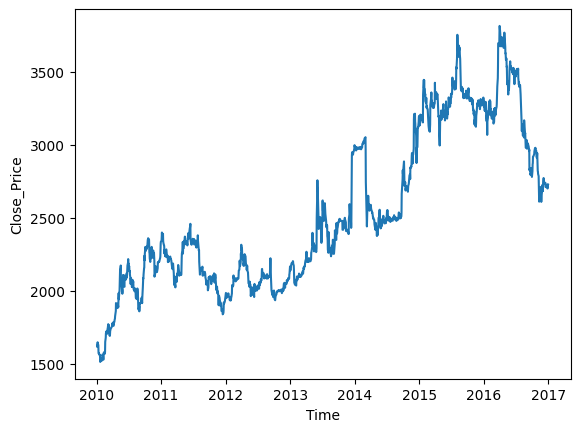

In [8]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

plt.plot(glaxo_df.Close);   # . is used to Acesss Close column  (Plot gives --> Linegraph)
plt.xlabel('Time');         # Take only Time
plt.ylabel('Close_Price');  # Take only Price

# "magic command" specific to Jupyter notebooks. It ensures that plots generated by matplotlib are displayed directly within the notebook output cell, rather than in a separate window.
# up and down (Price increase nad decrease)

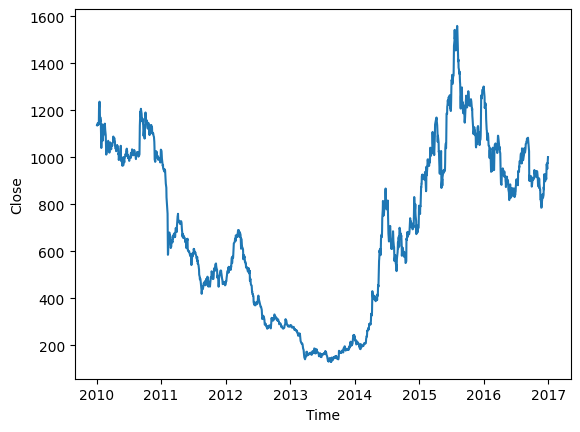

In [9]:
plt.plot(beml_df.Close);
plt.xlabel('Time');
plt.ylabel('Close');

# Up and down (Price increase nad decrease)
# The drop is huge. High variation

In [10]:
# Create a new column
# Percentage change of close column
# 1 is day

glaxo_df['gain'] = glaxo_df.Close.pct_change(periods = 1)
beml_df['gain'] = beml_df.Close.pct_change(periods = 1)

In [11]:
glaxo_df.head()

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1625.65,NaN
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398


In [12]:
#drop first row since it is NaN
# drop null vales dropna()

glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()

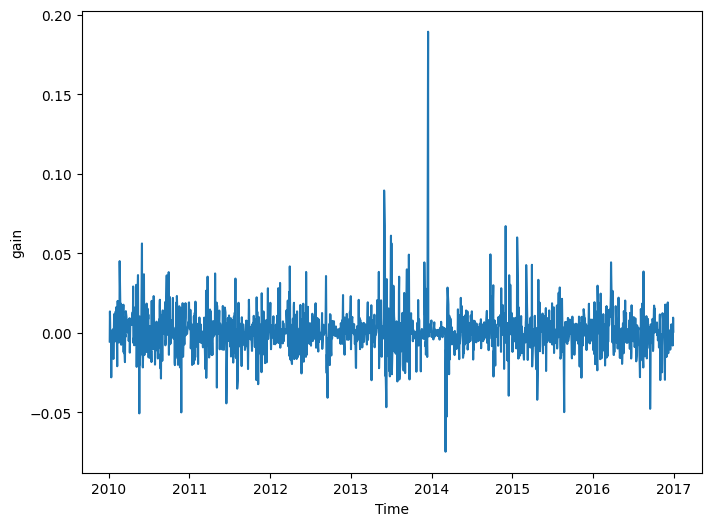

In [13]:
#Plot the gains
plt.figure(figsize = (8, 6));
plt.plot(glaxo_df.index, glaxo_df.gain);
plt.xlabel('Time');
plt.ylabel('gain');

# above 0 is poative gain  (Profit of stocks)
# above 0 is Negative gain (Loss of stocks)

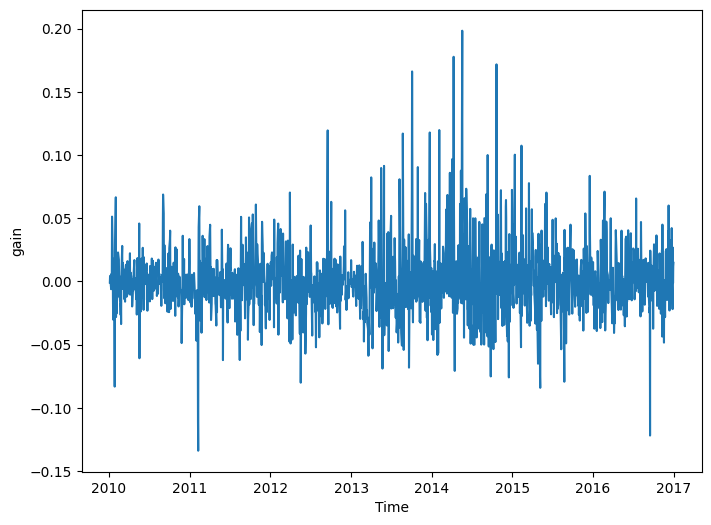

In [14]:
#Plot the gains
plt.figure(figsize = (8, 6));
plt.plot(beml_df.index, beml_df.gain);
plt.xlabel('Time');
plt.ylabel('gain');


<ipython-input-15-6d52dca4ec2c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(glaxo_df.gain, label = 'Glaxo');


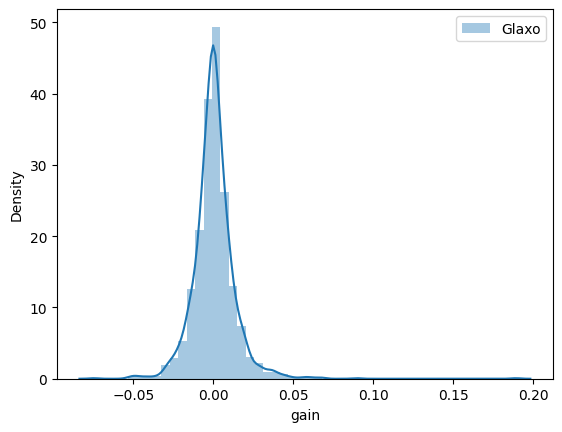

In [15]:
# Distribution Graph
# Combination of Histogram and frequency

sn.distplot(glaxo_df.gain, label = 'Glaxo');
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend();

<ipython-input-16-62f0451e1121>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(beml_df.gain, label = 'BEML');


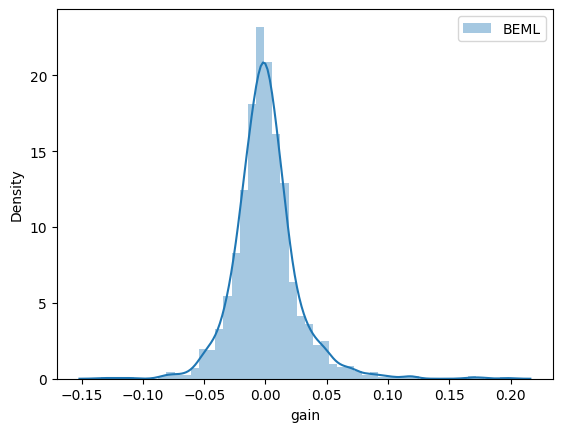

In [16]:
sn.distplot(beml_df.gain, label = 'BEML');
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend();

In [17]:
print('Mean:', round(glaxo_df.gain.mean(), 4))
print('Standard Deviation: ', round(glaxo_df.gain.std(), 4))
print('Standard Deviation: ', glaxo_df.gain.std())

Mean: 0.0004
Standard Deviation:  0.0134
Standard Deviation:  0.013360538552253333


In [18]:
print('Mean: ', round(beml_df.gain.mean(), 4))
print('Standard Deviation: ', round(beml_df.gain.std(), 4))

Mean:  0.0003
Standard Deviation:  0.0264


In [19]:
#Probability of making 2% loss or higher in Glaxo
# Gain is notthing but percentage
# Probabilty of <0.02    more lose (from distplot)
# Left side -0.02

from scipy import stats
stats.norm.cdf( -0.02,
loc=glaxo_df.gain.mean(),         # mean -- gain
scale=glaxo_df.gain.std())        # dstd -- gain

0.06352488667177397

In [20]:
#Probability of making 2% gain or higher in Glaxo
# Right side 0.02>


1 - stats.norm.cdf(0.02,
loc=glaxo_df.gain.mean(),           # mean -- gain
scale=glaxo_df.gain.std())

0.07104511457618568

### Inclass Exercise (Normal distribution of BEML)

In [21]:
# Compute 2% loss or gain for BEML
# profit


from scipy import stats
stats.norm.cdf( -0.02,
loc=beml_df.gain.mean(),
scale=beml_df.gain.std())

0.22155987503755287

In [22]:
#Probability of making 2% gain or higher in BEML
1 - stats.norm.cdf(0.02,
loc=beml_df.gain.mean(),
scale=beml_df.gain.std())

0.22769829484075355

In [ ]:
### ppf function is not compulsary

In [30]:
import scipy.stats as stats
# confidencial interval class #52 min

In [31]:
stats.norm.interval(0.95,1900,211.29)

# (Confidence interval , point estimator(xbar) , sigma/squrt(n))
# min = 1485.879209706532     , max = 2314.120790293468

(1485.879209706532, 2314.120790293468)

In [34]:
stats.norm.ppf(0.975)

# confidencial interval = 95%
# ppf = 1-alpha + alpha/2
# 1-alpha = cl = 95% = 0.95
# aplha   = 1- 0.95  = 0.05

# ppf = (0.95+0.05/2) = 0.95+0.025 = 0.975
# Only hypothesis testing at one instant you need this ppf

1.959963984540054

In [38]:
stats.norm.interval(0.90,1990,211.29)

(1642.4588771614233, 2337.5411228385765)

In [39]:
# confidencial interval = 90%
# ppf = 1-alpha + alpha/2
# 1-alpha = cl = 90% = 0.90
# aplha   = 1- 0.90  = 0.1

# ppf = (0.90+0.01/2) = 0.90+0.05 = 0.95
# Only hypothesis testing at one instant you need this ppf

# normalinterval ppfunction
stats.norm.ppf(0.95)

1.6448536269514722

In [42]:
# ci=(1-alpha) =0.95 , df = 139 , Xbar=1990 ,s/(sqr(n) = 239.46

from scipy import stats
stats.t.interval(0.95,139,1990,239.46)

# moin = 1516.545 , max = 2463.454

(1516.5450220969478, 2463.454977903052)

In [43]:
# confidencial interval = 95%
# ppf = 1-alpha + alpha/2
# 1-alpha = cl = 95% = 0.95
# aplha   = 1- 0.95  = 0.05

# ppf = (0.95+0.05/2) = 0.95+0.025 = 0.975

# 95% confidencial interval , df = 139
# t value = 1.977

stats.t.ppf(0.975,139)

1.977177724476122

# Normal distribution

Ex: find the probability that a normally distributed random variable has
a mean of 60 and a standard deviation of 10 and we want to find the probability that X is less than 70.



In [23]:
from scipy import stats
stats.norm.cdf(70 , loc=60,scale=10)

# Probabiluty = 0.8413

0.8413447460685429

Suppose GMAT scores can be reasonably modeled using a normal distribusion
mean = 711 and sd = 29

What is P(<= 680)?

In [24]:
stats.norm.cdf(680 , loc=711,scale=29)

0.14254260383881612

In [25]:
stats.norm.cdf(680,711,29)   ####P(x<680)

0.14254260383881612

In [26]:
##P(X>680)
1-stats.norm.cdf(680,711,29)

0.8574573961611839

What is P(697≤ X≤740)?


Step 1: Use P(x,≤ X ≤ x2) = Use P(X≤ x2) - P(X≤ x,)

Step 2: Calculate P(P(Xs x2) and P(X≤ x,) as before
- P(X ≤740) = P(Z ≤ 1) = 0.84
- P(X ≤697) = P(Z ≤ -0.5) = 0.31

Step 3: Calculate P(697≤ X≤740) = 0.84 - 0.31 = 0.53

In [27]:
stats.norm.cdf(740,711,29)       # X ≤740

0.8413447460685429

In [28]:
stats.norm.cdf(697,711,29)       # X ≤697

0.31463356742704107

In [29]:
stats.norm.cdf(740,711,29)-stats.norm.cdf(697,711,29)

0.5267111786415019

# Kaggle.com

### All data sets ML,DS